In [2]:
import numpy as np
from qiskit.algorithms.optimizers import SPSA,GradientDescent,COBYLA
from qiskit.quantum_info import Statevector

import qiskit

In [3]:
operator_to_index={'x':0,'z':1}   # we will store 

x0=Statevector([1/np.sqrt(2),1/np.sqrt(2)])
x1=Statevector([1/np.sqrt(2),-1/np.sqrt(2)])
z0=Statevector([1,0])
z1=Statevector([0,1])

measurement_list=[z0,z1,x0,x1]

def get_operator_list(measurement_list):
    op_list=[]
    for state in measurement_list:
        operator=np.outer(state,state)
        operator=operator/(len(measurement_list)/2)
        op_list.append(operator)
        
    return op_list


In [4]:
op_list=get_operator_list(measurement_list)
op_list

[array([[0.25+0.j, 0.  +0.j],
        [0.  +0.j, 0.  +0.j]]),
 array([[0.  +0.j, 0.  +0.j],
        [0.  +0.j, 0.25+0.j]]),
 array([[0.125+0.j, 0.125+0.j],
        [0.125+0.j, 0.125+0.j]]),
 array([[ 0.125+0.j, -0.125+0.j],
        [-0.125+0.j,  0.125-0.j]])]

In [5]:
operator_to_index={'x':0,'z':1}   # we will store 



class OptimizerLog:
    """Log to store optimizer's intermediate results"""
    def __init__(self):
        self.evaluations = []
        self.parameters = []
        self.costs = []
    def update(self, evaluation, parameter, cost, _stepsize, _accept=None):
        """Save intermediate results. Optimizer passes five values
        but we ignore the last two."""
        self.evaluations.append(evaluation)
        self.parameters.append(parameter)
        self.costs.append(cost)


class GDOptimizerLog:
    """Log to store optimizer's intermediate results"""
    def __init__(self):
        self.evaluations = []
        self.parameters = []
        self.costs = []
    def update(self, evaluation, parameter, cost, norm):
        """Save intermediate results. Optimizer passes five values
        but we ignore the last two."""
        self.evaluations.append(evaluation)
        self.parameters.append(parameter)
        self.costs.append(cost)



def cost_function(frequency_data,parameters):
    loss=0
    x=parameters[0]
    z=parameters[1]
    rho=0.5*np.array([[1+z,x],[x,1-z]])
    i=0
    for key,value in frequency_data.items():
       
        
        
        operator=op_list[i]
        
        predicted_prob= np.trace(np.matmul(rho,operator))
        loss=loss-value*np.log(np.abs(predicted_prob))
        i+=1
    
    loss=loss+1000*(np.linalg.norm(parameters) - 1)**2       #add for constraint that the state lies on the bloch sphere
    return loss

        
def objective_function(parameters):
    """Cost function of circuit parameters on training data.
    The optimizer will attempt to minimize this."""
    
    return cost_function(frequency_data , parameters)

#
## The  frequencies we want (target frequencies) given as dictionary. Can change later (for arbitary directions)
## x1/x0 is the number of outcomes with output '1' / '0' when measuring along x


In [6]:
frequency_data={'z0':0.25, 'z1':0.25 ,'x0':0.5 ,'x1':0}
# frequency_data = {'z0':0.25, 'z1':0.25 }   for single basis


In [7]:
# Set and optimizer
SPSA_log=OptimizerLog()

optimizer_SPSA = SPSA(maxiter=200, callback=SPSA_log.update)


In [8]:
num_params=2   # Two parameters for x and z coordinate of the state on bloch sphere
repeat=True
while(repeat):
    initial_point=np.random.random(num_params)    # To get a state inside the bloch sphere only
    if np.linalg.norm(initial_point)<1:
        repeat=False

initial_point=[0.07123558, 0.57687658]

result_SPSA=optimizer_SPSA.minimize(objective_function,initial_point)

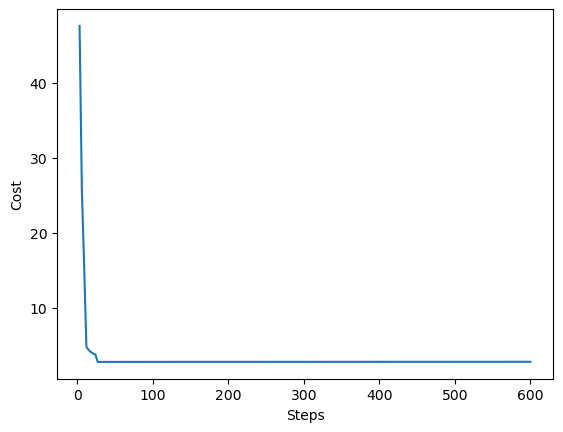

2.7983972164302244
[-0.61226736  0.78902625]
600


In [9]:
opt_var = result_SPSA.x
opt_value = result_SPSA.fun
y=result_SPSA.nfev

import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(SPSA_log.evaluations, SPSA_log.costs)
plt.xlabel('Steps')
plt.ylabel('Cost')
plt.show()
print(opt_value)
print(opt_var)
print(y)

In [10]:
print('Norm of state = ', np.linalg.norm(opt_var)) 

# SPSA_log.parameters[:]




Norm of state =  0.9987160531998579
